## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
- William Chen 1400081
- Petr Andreev 1375858
- Rafsan Al Mamun 1407776
- Ojaswi Dheer 1447227

# Air Quality Analysis in Victoria
---------------------------------
This section of the notebook explores air quality data collected from various monitoring stations in Victoria. The dataset includes hourly average measurements of air quality parameters. The objective of this analysis is to gain insights into the temporal trends, spatial variations, and potential impacts of air pollution on public health in Victoria.

## Import Necessary Libraries:
----------------------------

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import folium
import requests

## Load the Dataset:
--------------------

### Dataset Description

The dataset used in this analysis contains hourly average measurements of air quality parameters from various monitoring stations in Victoria. The dataset is sourced from EPA and includes the following columns:

- date: Date of observation
- time: Time of observation
- location_name: Name of the monitoring station
- latitude: Latitude coordinates of the monitoring station
- longitude: Longitude coordinates of the monitoring station
- value: Value of the observed air quality parameter
- parameter_name: Name of the observed air quality parameter

The objective of this analysis is to explore the relationship between air quality parameters and potential impacts on public health, particularly focusing on parameters such as CO (Carbon Monoxide), PM10 (Particulate Matter with diameter less than 10 micrometers), PM2.5 (Particulate Matter with diameter less than 2.5 micrometers), O3 (Ozone), and SO2 (Sulfur Dioxide). These parameters are known to have significant implications for air quality and human health.

Before proceeding with the analysis, we will load the dataset.


In [64]:
# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [84]:
# Load dataset with elastic 
from elasticsearch8 import Elasticsearch, helpers

def get_client():
    return Elasticsearch (
            'https://localhost:9200',
            verify_certs= False,
            basic_auth=('elastic', 'elastic'))
    
def get_bulker():
    return helpers


fission_url = 'http://localhost:9090/datasets/'


In [ ]:
def query_elastic(index, query):

    es = get_client()
    list_of_docs = []

    # Initialize the scroll
    scroll = es.search(
        index=index,
        body=query,
        scroll='2m',  # Keep the search context alive for 2 minutes
        size=10000  # Number of results per page
    )
    print(scroll)
    # Keep track of the scroll ID
    scroll_id = scroll['_scroll_id']

    # Fetch the initial page of results
    for doc in scroll['hits']['hits']:
        print("DOC", doc)
        list_of_docs.append(doc['_source'])
    print("len", len(list_of_docs))
    # Use the scroll ID to fetch the next batch of documents
    while True:
        response = es.scroll(scroll_id=scroll_id, scroll='2m')
        print('response', response)
        # Break the loop if there are no more documents
        if not response['hits']['hits']:
            break
        
        for doc in response['hits']['hits']:
            list_of_docs.append(doc['_source'])
        print("len", len(list_of_docs))
    # Clean up the scroll context
    es.clear_scroll(scroll_id=scroll_id)
    return list_of_docs


In [127]:
query = {"query": {"match_all": {}}}
list_of_docs = query_elastic("mortality_males", query)
print('list_of_docs', list_of_docs)

/tmp/ipykernel_48098/1063111814.py:7: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  scroll = es.search(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


{'_scroll_id': 'FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFm0zYUdiUFV3UmtLQjlhRjhVNmF2SXcAAAAAADPU2BZhX2IyVG1EdFFSNkgxT1hsTG94X0dR', 'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 15, 'relation': 'eq'}, 'max_score': 1.0, 'hits': [{'_index': 'mortality_males', '_id': '4dsKaI8Bcdton2Sn9FX4', '_score': 1.0, '_source': {'create': {'all_cancer_population': '11446232', 'all_cancer_total_mortality': '21587', 'gccsa_code': '1GSYD', 'gccsa_name': 'Greater Sydney', 'lung_cancer_population': '11446232', 'lung_cancer_rate_per_100k': '37.96', 'lung_cancer_total_mortality': '4345'}}}, {'_index': 'mortality_males', '_id': '4tsKaI8Bcdton2Sn9FX4', '_score': 1.0, '_source': {'create': {'all_cancer_population': '6494492', 'all_cancer_total_mortality': '19223', 'gccsa_code': '1RNSW', 'gccsa_name': 'Rest of NSW', 'lung_cancer_population': '6494492', 'lung_cancer_rate_per_100k': '61.25', 'lung_cancer_total_mortality': '39

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


response {'_scroll_id': 'FGluY2x1ZGVfY29udGV4dF91dWlkDXF1ZXJ5QW5kRmV0Y2gBFm0zYUdiUFV3UmtLQjlhRjhVNmF2SXcAAAAAADPU2BZhX2IyVG1EdFFSNkgxT1hsTG94X0dR', 'took': 1, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 15, 'relation': 'eq'}, 'max_score': 1.0, 'hits': []}}


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


list_of_docs [{'create': {'all_cancer_population': '11446232', 'all_cancer_total_mortality': '21587', 'gccsa_code': '1GSYD', 'gccsa_name': 'Greater Sydney', 'lung_cancer_population': '11446232', 'lung_cancer_rate_per_100k': '37.96', 'lung_cancer_total_mortality': '4345'}}, {'create': {'all_cancer_population': '6494492', 'all_cancer_total_mortality': '19223', 'gccsa_code': '1RNSW', 'gccsa_name': 'Rest of NSW', 'lung_cancer_population': '6494492', 'lung_cancer_rate_per_100k': '61.25', 'lung_cancer_total_mortality': '3978'}}, {'create': {'all_cancer_population': '10330270', 'all_cancer_total_mortality': '19747', 'gccsa_code': '2GMEL', 'gccsa_name': 'Greater Melbourne', 'lung_cancer_population': '10330270', 'lung_cancer_rate_per_100k': '36.72', 'lung_cancer_total_mortality': '3793'}}, {'create': {'all_cancer_population': '3403079', 'all_cancer_total_mortality': '10031', 'gccsa_code': '2RVIC', 'gccsa_name': 'Rest of Vic', 'lung_cancer_population': '3403079', 'lung_cancer_rate_per_100k': '56

In [115]:
url = fission_url + 'air-quality-hourly-avg'
print(url)
response = requests.get(url)
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    print("Data received from Fission function:", data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
filtered_data = pd.DataFrame(data)

http://localhost:9090/datasets/air-quality-hourly-avg
Data received from Fission function: {'data': [], 'success': True}


In [116]:
print(response)

<Response [200]>


In [109]:
# Load the dataset
data = pd.read_excel('../data/2022_All_sites_air_quality_hourly_avg.xlsx', sheet_name='AllData', usecols='A:G')

# Filter the DataFrame to select only specific parameter names
selected_parameters = ['CO', 'PM10', 'PM2.5', 'O3', 'SO2']
filtered_data = data[data['parameter_name'].isin(selected_parameters)]

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

## Data Preprocessing:
-------------------

Before delving into detailed analysis, it's crucial to preprocess the dataset to ensure its quality and suitability for further exploration:

1. Data Conversion: Convert the 'date' column to datetime format to facilitate temporal analysis.
2. Filtering: Apply filters to select specific air quality parameters of interest for focused analysis.

By performing these preprocessing steps, we can streamline the data and focus our analysis on the relevant air quality parameters, setting the foundation for insightful exploration.


In [4]:
# Reset the index
filtered_data.reset_index(drop=True, inplace=True)

# Convert 'date' column to datetime data type
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract only the date portion from the datetime column
filtered_data['date'] = filtered_data['date'].dt.date

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_54177/1248701647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_54177/1248701647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].dt.date


In [5]:
# Display the first few rows of the filtered DataFrame
print(filtered_data.head())

         date      time location_name   latitude   longitude   value parameter_name
0  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   0.356             CO
1  2021-12-31  23:00:00   Mooroolbark -37.774967  145.328500  49.150           PM10
2  2021-12-31  23:00:00     Traralgon -38.194282  146.531464  27.504           PM10
3  2021-12-31  23:00:00     Footscray -37.803709  144.869342  33.061           PM10
4  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   3.327          PM2.5


## Data Examination:
-----------------

Before conducting detailed analysis, it's essential to perform initial checks and preparations on the dataset:

1. Summary Statistics: Compute summary statistics to understand the distribution and central tendencies of the data.

2. Missing Values: Check for any missing values in the dataset and handle them appropriately.

Let's proceed with examining the data to ensure its quality and suitability for analysis.


### Summary Statistics:
-----------------
By examining the summary statistics from various angles and considering their implications in the broader context of air quality management and public health, we can uncover valuable insights and inform evidence-based decision-making.

In [6]:
# Compute summary statistics for each parameter in 'parameter_name'
parameter_summary_stats = filtered_data.groupby(['parameter_name'])['value'].describe()

# Display summary statistics for each parameter
print("Summary Statistics by Parameter:")
print(parameter_summary_stats)

Summary Statistics by Parameter:
                  count       mean        std     min    25%     50%      75%      max
parameter_name                                                                        
CO              43966.0   0.167876   0.128603  -0.589  0.095   0.144   0.2060    1.912
O3              66467.0  16.296012   9.242939  -0.971  9.937  16.684  22.4985   66.943
PM10            56597.0  16.437867  11.658281 -19.612  9.208  13.903  20.7580  416.870
PM2.5           81045.0   5.775832   5.362307 -42.107  2.466   4.900   8.0410   96.918
SO2             49353.0   0.434215   1.719208  -5.458 -0.070   0.280   0.6780  115.233


### Insights from Summary Statistics:

1. Presence of Negative Values:
   The summary statistics reveal the presence of negative values for certain air quality parameters (e.g., CO, O3, PM10, PM2.5, SO2), indicating potential measurement errors or anomalies that require further investigation and data cleaning to ensure data quality.

2. Wide Range of Values:
   The wide range of values observed for each parameter suggests significant variability in air quality across different observations. This variability could be influenced by factors such as location, time of day, weather conditions, and human activities, highlighting the complex nature of air quality dynamics.

3. Extreme Values:
   Some parameters exhibit extreme maximum values (e.g., PM10, PM2.5, SO2), indicating the presence of outliers or highly polluted conditions in certain instances.

4. Differences in Central Tendencies:
   Notable differences in the central tendencies (mean, median) of air quality parameters indicate variations in data distribution. For example, a right-skewed distribution is observed for PM2.5 concentrations, with some high-value outliers influencing the mean.

5. Standard Deviation and Variability:
   Parameters with higher standard deviations (e.g., PM10, PM2.5) exhibit greater variability in concentrations, suggesting heterogeneous spatial and temporal patterns in air quality. This variability underscores the importance of considering local factors and temporal trends in air quality management efforts.

6. Comparative Analysis and Health Implications:
   Comparative analysis of summary statistics across parameters highlights differences in emission sources, atmospheric processes, and regional variability for various pollutants. Parameters exceeding regulatory limits or health guidelines may pose increased health risks to exposed populations, emphasizing the importance of air quality monitoring and mitigation measures.

### Missing Values:
--------------------
Detect and remove missing values for a more comprehensive analysis.

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(filtered_data.isnull().sum())


Missing values in the dataset:
date              0
time              0
location_name     0
latitude          0
longitude         0
value             0
parameter_name    0
dtype: int64


## Exploratory Data Analysis (EDA):
-----------------------------------------

In this section, we delve deeper into the air quality dataset through various analytical approaches to gain valuable insights into air quality dynamics across different dimensions.

1. Distribution of Data Across Monitoring Locations:
   We start by visualizing the distribution of data across monitoring locations using a pie chart. This analysis provides an overview of the distribution of observations among different monitoring stations, offering insights into the spatial coverage of the dataset.

2. Comparative Analysis Across Locations:
   Next, we perform a comparative analysis to compare air quality parameters across different monitoring locations. Through box plots grouped by location and parameter, we explore spatial variations in air quality and investigate potential differences in pollution levels among monitoring stations.

3. Temporal Trend Analysis:
   Moving on, we conduct a temporal trend analysis to examine how air quality parameters vary over time. By calculating the monthly average of air quality parameters and visualizing the temporal trends, we aim to identify seasonal patterns and long-term trends in air quality dynamics.

4. Spatial Analysis:
Finally, we conduct a spatial analysis of the air quality data to visually analyse the spread of PM2.5 particles across Victoria. This will help us pinpoint locations of interest where there is a higher chance of lung-related disorders.

These analytical approaches provide valuable insights into the spatial, temporal, and parameter-wise variations in air quality, contributing to a comprehensive understanding of air quality dynamics in the study area.


### Distribution of Data Across Monitoring Locations:
----------------------
Let's plot a pie chart to check which locations have the most data available. However, since there are 20 locations in the dataset, viewing all of them will cause overlaps. So, we will group the data into major locations.

Moreover, not every location has values for the same group of pollutants. Hence, we will focus on only PM2.5 which is thought to be the most dangerous for lung diseases.

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_54177/3926427244.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'aggregated_location'] = filtered_data['location_name'].apply(aggregate_locations)


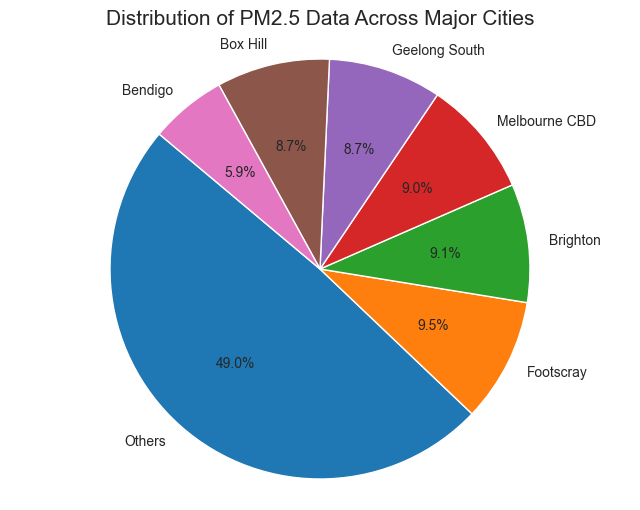

In [8]:
# Define the list of major cities
major_cities = ['Melbourne CBD', 'Geelong South', 'Bendigo', 'Dandenong', 'Footscray', 'Box Hill', 'Brighton']

# Define the aggregation function
def aggregate_locations(location):
    if location in major_cities:
        return location
    else:
        return 'Others'

# Apply the aggregation function to create a new column 'aggregated_location'
filtered_data.loc[:, 'aggregated_location'] = filtered_data['location_name'].apply(aggregate_locations)

# Calculate counts for each aggregated location
location_counts = filtered_data[filtered_data['parameter_name'] == 'PM2.5']['aggregated_location'].value_counts()

# Create a pie chart with aggregated locations
plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PM2.5 Data Across Major Cities', fontsize=15, pad=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Insights from Data Distribution Chart:

1. Overall Picture:
The major cities account for about 51% of all the data related to PM2.5 particle in the dataset.

2. Urban Centers with Higher PM2.5 Levels:
Locations such as Melbourne CBD, Footscray, and Box Hill, with PM2.5 proportions ranging from 8.7% to 9.5%, likely correspond to urban centers or areas with higher population density and vehicular traffic. These areas typically experience elevated PM2.5 levels due to emissions from vehicles, industrial activities, and urban development.

3. Local Pollution Hotspots:
Locations like Brighton, known for their proximity to busy roads or industrial zones, have relatively higher proportions of PM2.5 data (9.1%). These areas may represent local pollution hotspots where emissions from transportation, industrial processes, or residential heating contribute to elevated PM2.5 levels.

### Distribution of PM2.5 Across Different Locations:
------------------------------
Next, let's have a look at the distribution of PM2.5 across the locations to explore spatial variations in air quality and investigate potential differences in pollution levels among monitoring stations.


In [9]:
# Filter data for PM2.5 parameter
pm25_data = filtered_data[filtered_data['parameter_name'] == 'PM2.5']

# Get summary statistics of PM2.5 by location
pm25_data.groupby('location_name')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location_name,,,,,,,,
Alphington,8208.0,6.623458,6.361076,-16.078,2.70775,5.5970,9.28075,70.568
Bendigo,4778.0,3.321866,4.173993,-12.334,0.62900,2.7700,5.35875,42.761
Box Hill,7062.0,5.096341,5.760784,-9.004,1.83775,4.1545,7.13725,96.918
Brighton,7395.0,6.893843,5.934735,-10.695,3.38700,5.8470,8.89250,70.308
Campbellfield,1718.0,6.479662,5.771613,-4.838,2.94100,5.4585,8.69900,54.265
Churchill,3506.0,5.840987,5.058105,-5.780,2.54150,5.1770,8.32325,41.492
Footscray,7739.0,5.760731,4.948256,-7.860,2.59000,4.9420,7.94750,46.202
Geelong South,7068.0,4.395366,4.737065,-10.540,1.53800,3.5635,6.19075,76.920
Melbourne CBD,7293.0,7.273835,5.196347,-5.565,3.88200,6.5410,9.76100,56.727


From the summary statistics, it can be seen that there is a large dispersion (min/max value) of the data for each location from their measures of central tendency. Hence, there is a possibility of large outliers that might distort the boxplots for the distribution of PM2.5 across different locations, so we will plot the charts without these outliers.

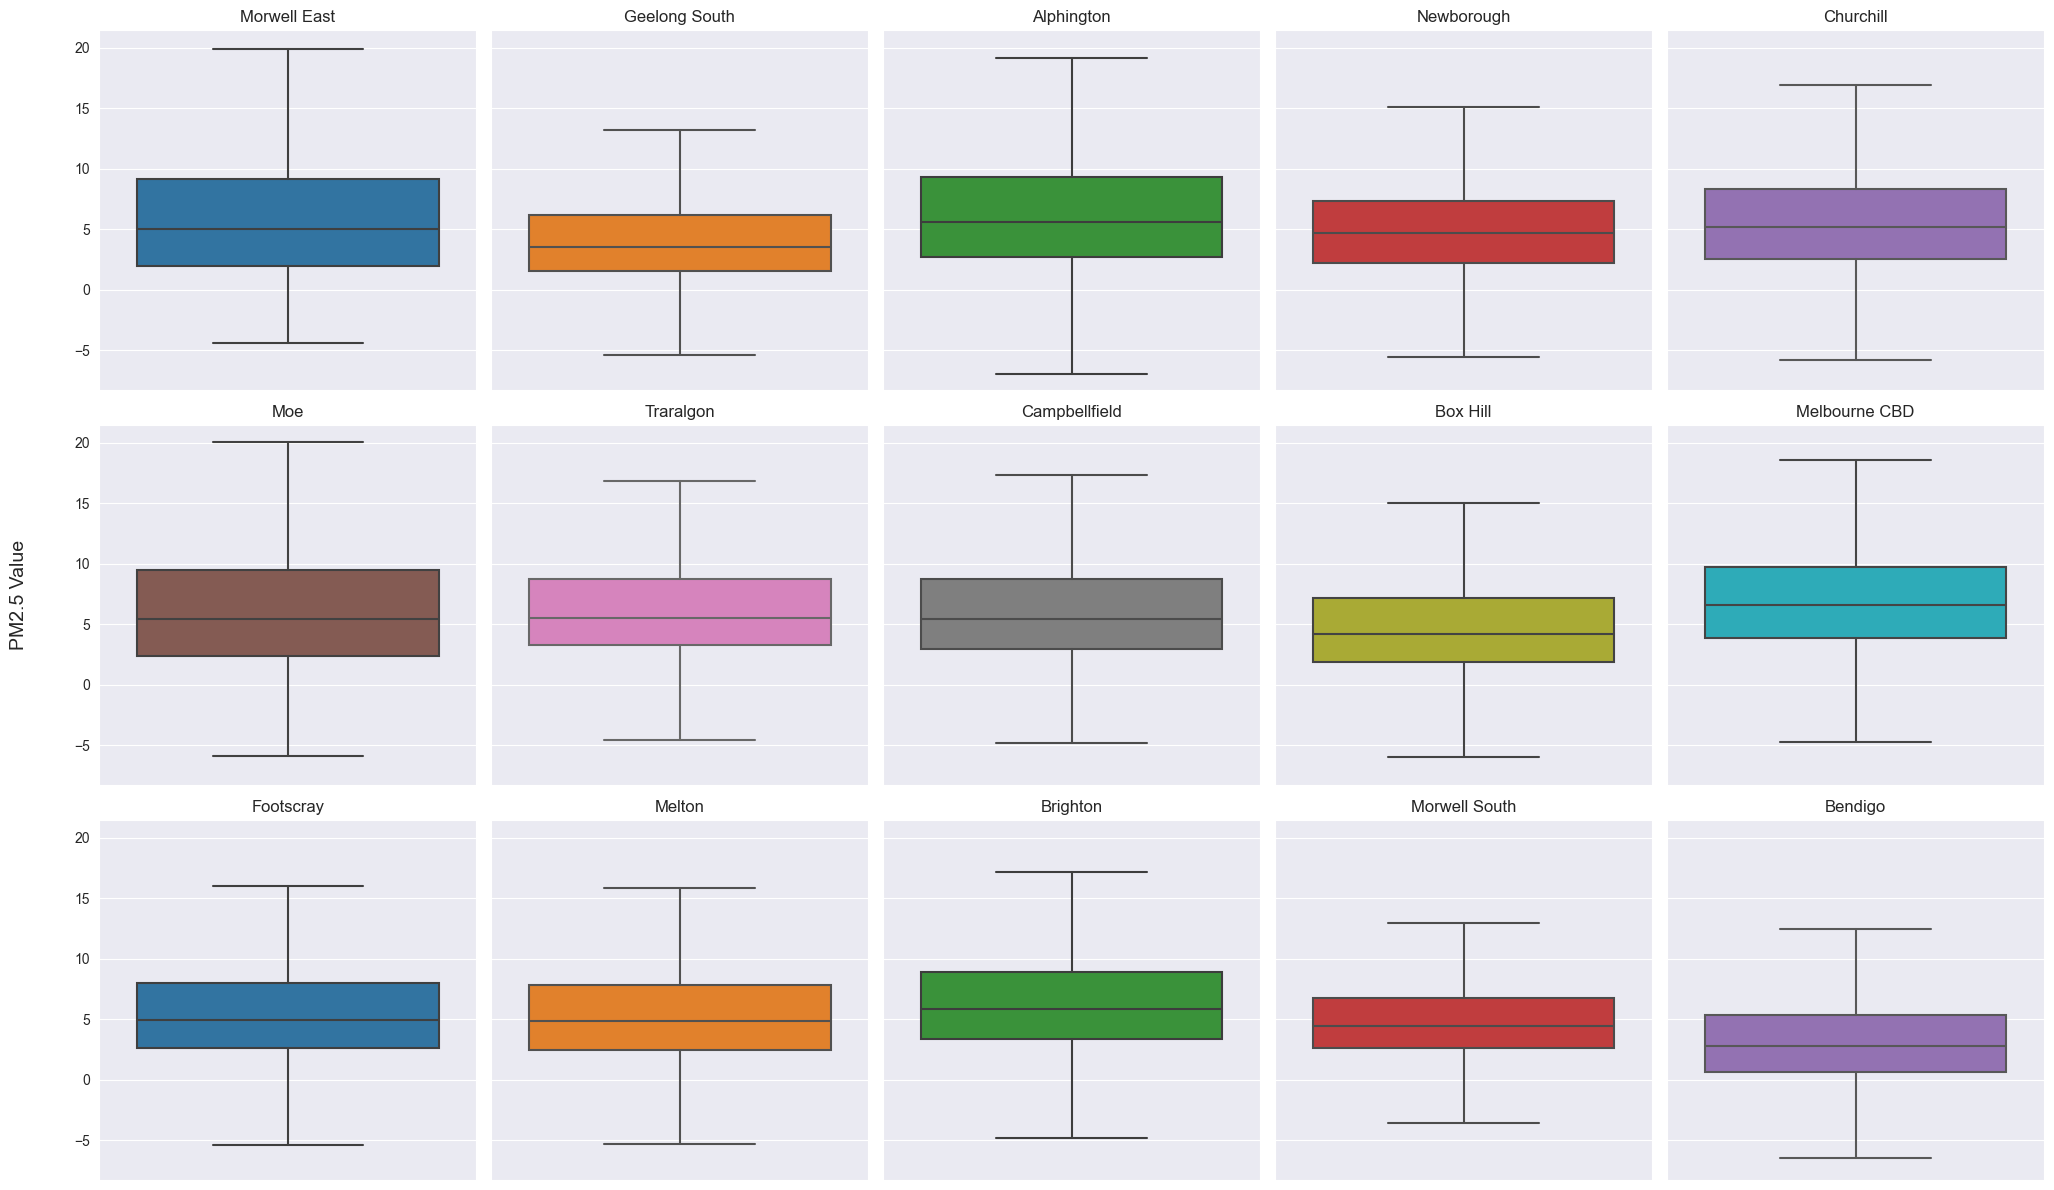

In [10]:
# Get unique locations
unique_locations = pm25_data['location_name'].unique()

# Calculate number of rows and columns
num_locations = len(unique_locations)
num_rows = 3
num_cols = math.ceil(num_locations / num_rows)

# Define a custom color palette with enough distinct colors
palette = sns.color_palette('tab10', n_colors=num_locations)

# Create subplots for each location
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12), sharey=True)

# Flatten axes array to handle both single and multiple subplots
axes = axes.flatten()

# Iterate over unique locations and create boxplots
for i, location in enumerate(unique_locations):
    sns.boxplot(y='value', data=pm25_data[pm25_data['location_name'] == location], ax=axes[i], color=palette[i], showfliers=False)
    axes[i].set_title(f'{location}')
    axes[i].set_ylabel('')

# Add shared y-axis label
fig.text(-0.02, 0.5, 'PM2.5 Value', ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

### Insights from PM2.5 Distribution Across Locations:

1. Variability:
There is considerable variability in PM2.5 levels across different locations, as indicated by the range of values and standard deviations. For instance, standard deviations range from approximately 3.70 µg/m³ to 6.36 µg/m³, suggesting differing levels of air pollution or local factors affecting PM2.5 concentrations.

2. Urban vs. Regional:
Urban areas like Melbourne CBD and Box Hill tend to have higher mean PM2.5 levels compared to regional areas like Bendigo and Traralgon. For example, Melbourne CBD exhibits a mean PM2.5 level of approximately 7.27 µg/m³, whereas Bendigo has a mean of about 3.32 µg/m³. This discrepancy suggests differing sources of pollution, including traffic congestion, industrial activities, and population density, influencing urban air quality.

3. Outliers:
Some locations exhibit outliers with extremely high or low PM2.5 values, as indicated by the minimum and maximum values. For instance, Box Hill shows a maximum PM2.5 value of approximately 96.92 µg/m³, while Morwell South has a minimum of around -42.11 µg/m³. These outliers may be indicative of unusual events or localized sources of pollution, warranting further investigation.

4. Temporal Patterns:
Although not explicitly shown here, examining temporal patterns in PM2.5 levels could provide additional insights. Seasonal variations, diurnal patterns, and trends over time may reveal underlying factors influencing air quality at different locations.


## Temporal Trend Analysis:
---------------------------
Next, we examine how PM2.5 levels vary over time to identify seasonal patterns and long-term trends in air quality dynamics. For that we will plot the hourly and monthly trends of PM2.5 across all locations.

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_54177/2768048360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data.loc[:, 'hour'] = pm25_data['time'].apply(lambda x: x.hour)


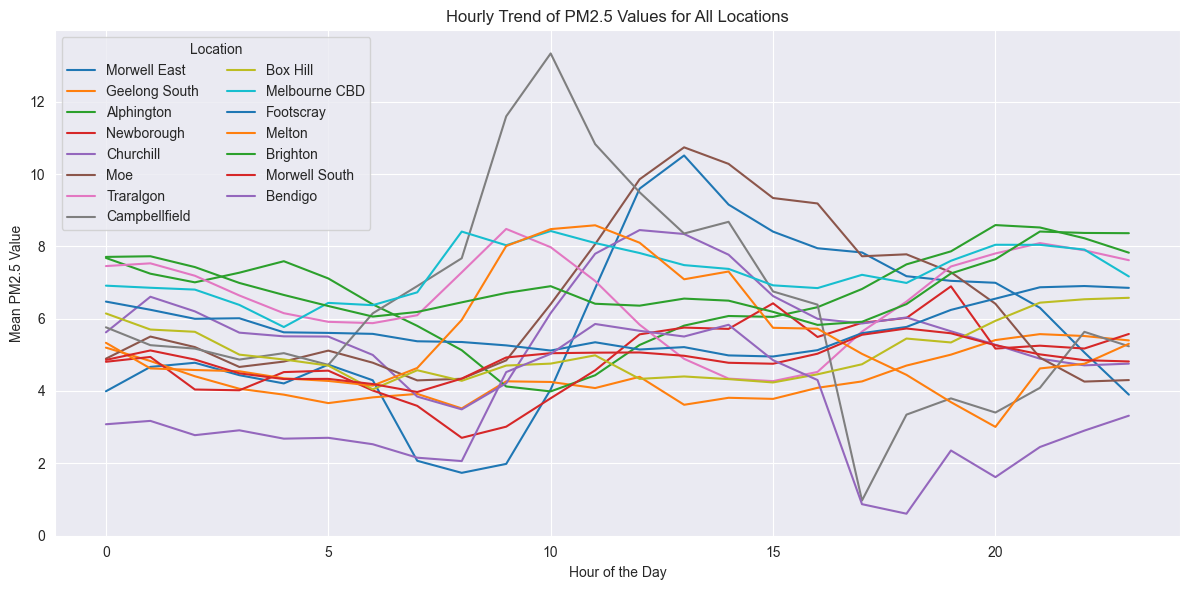

In [11]:
# Extract hour from time
pm25_data.loc[:, 'hour'] = pm25_data['time'].apply(lambda x: x.hour)

# Plot hourly trend for all locations using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data, x='hour', y='value', hue='location_name', errorbar=None, palette=palette)

plt.title('Hourly Trend of PM2.5 Values for All Locations')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean PM2.5 Value')
plt.legend(title='Location', loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from Hourly Trend of PM2.5 Across All Locations:

1. Impact of Human Activity:
Higher PM2.5 levels are observed during the day, indicating the influence of peak human activity hours. This may be attributed to increased traffic congestion, industrial operations, and energy consumption (e.g., from heating, cooking, and air conditioning), which release particulate matter into the air.

2. Influence of Meteorological Factors:
The plot suggests a significant role of atmospheric conditions in PM2.5 levels, with elevated concentrations observed during daylight hours. Factors such as temperature, sunlight, and wind patterns contribute to the dispersion and accumulation of pollutants, leading to higher pollution levels during the day.

3. Patterns in Emissions:
Diurnal variations in PM2.5 levels are evident, suggesting different emission patterns throughout the day. Activities such as rush-hour traffic and industrial production may result in increased emissions during daytime hours, impacting air quality.

4. Regional and Local Variations:
Spatial and temporal variability in PM2.5 concentrations is observed, influenced by regional and local factors such as geographical location, urbanization, and proximity to emission sources. These factors contribute to the observed hourly trends in PM2.5 values across different locations.


/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_54177/2527978886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data.loc[:, 'month'] = pm25_data['date'].apply(lambda x: x.month)


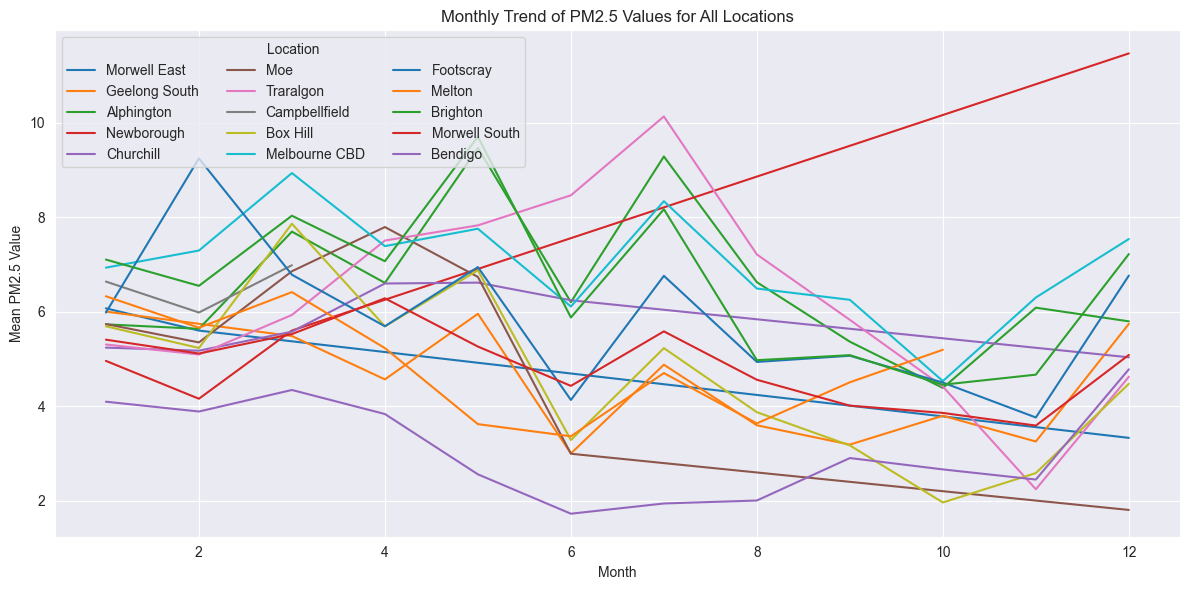

In [12]:
# Extract month from date
pm25_data.loc[:, 'month'] = pm25_data['date'].apply(lambda x: x.month)

# Plot monthly trend for all locations using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data, x='month', y='value', hue='location_name', errorbar=None, palette=palette)

plt.title('Monthly Trend of PM2.5 Values for All Locations')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Value')
plt.legend(title='Location', loc='upper left', ncol=3)

plt.grid(True)
plt.tight_layout()
plt.show()


### Insights from Monthly Trend of PM2.5 Across All Locations:

1. Seasonal Transitions:
The observed increase in PM2.5 values between March and August may coincide with transitional seasons. Weather phenomena such as temperature inversions, where a layer of warm air traps cooler air close to the ground, can occur more frequently during autumn and winter in Victoria. Inversion events can lead to the stagnation of pollutants near the surface, resulting in higher PM2.5 levels, especially in urban areas with high emissions.

2. Wood Burning and Heating:
Cooler temperatures during autumn and winter may lead to increased use of wood heaters and fireplaces for residential heating purposes. Wood combustion emits particulate matter and other pollutants, which can contribute to higher PM2.5 concentrations, particularly in urban and rural areas.

3. Industrial and Urban Sources:
Autumn and winter months may see increased industrial and urban activities, which can emit pollutants such as PM2.5. Factors such as increased energy demand, industrial production, and vehicular traffic in response to cooler temperatures may contribute to higher PM2.5 concentrations during this period.

4. Always Increasing Trend of Newborough:
Coal-fired power plants like Yallourn can be significant sources of particulate matter (including PM2.5) emissions, and there has been rising safety concerns surrounding this plant over the last few years.

Based on both the hourly and monthly trends, it seems like Churchill might be a safe place to live in regard to PM2.5 pollution as it sees the lowest overall exposure to the pollutant. Such low levels of PM2.5 can reduce the chances of contracting lung diseases.


## Spatial Analysis:
------------------------
Finally, we conduct a spatial analysis of the air quality data to visually analyse the spread of PM2.5 particles across Victoria. This will help us pinpoint locations of interest where there is a higher chance of lung-related disorders.

In [13]:
# Filter the DataFrame to keep only rows between 1 Jan 2022 and 31 Dec 2022
start_date = pd.to_datetime('2022-01-01').date()
end_date = pd.to_datetime('2022-12-31').date()

pm25_data = pm25_data[(pm25_data['date'] >= start_date) & (pm25_data['date'] <= end_date)]

In [14]:
# Group by suburb, parameter_name, and month, average sum the values
summed_data = pm25_data.groupby(['location_name', 'parameter_name', 'latitude', 'longitude'])['value'].mean().reset_index()
summed_data.head()

,location_name,parameter_name,latitude,longitude,value
0,Alphington,PM2.5,-37.778408,145.030600,6.622210
1,Bendigo,PM2.5,-36.778400,144.300069,3.321866
2,Box Hill,PM2.5,-37.828728,145.132400,5.096341
3,Brighton,PM2.5,-37.913547,144.998000,6.893843
4,Campbellfield,PM2.5,-37.679276,144.965717,6.479662


In [15]:
map_center = [-37.82, 145.4]
# Create a map centered around Melbourne
map_melbourne = folium.Map(location=map_center, zoom_start=9, width=1000, height=1000)

# Add title to the map
title_html = '<h3 align="center" style="font-size:25px"><b>Air Quality (PM2.5) in Victoria</b></h3>'
map_melbourne.get_root().html.add_child(folium.Element(title_html))

# Define a colormap
colormap = folium.LinearColormap(colors=['orange', 'red', 'black'],
                                  vmin=summed_data['value'].min(),
                                  vmax=summed_data['value'].max(),
                                  caption='PM2.5')


# Add CircleMarkers for each location
for index, row in summed_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['value'] * 3,
        color=colormap(row['value']),
        fill=True,
        fill_color=colormap(row['value']),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['location_name']}: PM2.5 = {row['value']:.1f}", parse_html=True),
    ).add_to(map_melbourne)

    # Add PM2.5 values inside CircleMarkers
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(html=f"<div style='font-size: 8pt; color: white;'>{row['value']:.1f}</div>"),
        icon_anchor=(0, 0)
    ).add_to(map_melbourne)

# Add the color scale
colormap.add_to(map_melbourne)

# Display the map
map_melbourne


# Lung Disease Analysis in Victoria
---------------------------------
This section of the notebook explores lung disease data collected from SUDO across all of Australia. The dataset includes mortality rates, income levels, employment status, gender etc for asthma and COPD. The objective of this analysis is to gain insights into the relationship of demographics with lung diseases.

## Load the Dataset:
--------------------

There are several datasets for this analysis that contains statistics for lung diseases across various factors.

Before proceeding with the analysis, we will load all the datasets.

In [136]:
# Load the datasets
response = requests.get(fission_url + 'lung-cancer/mortality_males')
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    print("Data received from Fission function:", data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
male_lung_cancer_data = pd.DataFrame(data['data'])

# Load the datasets
response = requests.get(fission_url + 'lung-cancer/mortality_females')
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    print("Data received from Fission function:", data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
female_lung_cancer_data = pd.DataFrame(data['data'])

# Load the datasets
response = requests.get(fission_url + 'lung-cancer/mortality_persons')
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    print("Data received from Fission function:", data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
all_lung_cancer_data = pd.DataFrame(data['data'])

# Load the datasets
response = requests.get(fission_url + 'lung-cancer/census-by-inc')
if response.status_code == 200:
    # Parse JSON response
    data = response.json()
    print("Data received from Fission function:", data)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
all_lung_cancer_data = pd.DataFrame(data['data'])




male_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_males_gccsa_2009.csv')
female_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_females_gccsa_2009.csv')
all_lung_cancer_data = pd.read_csv('../data/lung_disease_dataset/aihw_cimar_mortality_persons_gccsa_2009.csv')
census_by_cob_data = pd.read_csv('../data/lung_disease_dataset/abs_2021census_g21a_aust_gccsa.csv')
census_by_inc_emp_data = pd.read_csv('../data/lung_disease_dataset/abs_2021census_g21b_aust_gccsa.csv')

Data received from Fission function: {'data': [{'create': {'all_cancer_population': '11446232', 'all_cancer_total_mortality': '21587', 'gccsa_code': '1GSYD', 'gccsa_name': 'Greater Sydney', 'lung_cancer_population': '11446232', 'lung_cancer_rate_per_100k': '37.96', 'lung_cancer_total_mortality': '4345'}}, {'create': {'all_cancer_population': '6494492', 'all_cancer_total_mortality': '19223', 'gccsa_code': '1RNSW', 'gccsa_name': 'Rest of NSW', 'lung_cancer_population': '6494492', 'lung_cancer_rate_per_100k': '61.25', 'lung_cancer_total_mortality': '3978'}}, {'create': {'all_cancer_population': '10330270', 'all_cancer_total_mortality': '19747', 'gccsa_code': '2GMEL', 'gccsa_name': 'Greater Melbourne', 'lung_cancer_population': '10330270', 'lung_cancer_rate_per_100k': '36.72', 'lung_cancer_total_mortality': '3793'}}, {'create': {'all_cancer_population': '3403079', 'all_cancer_total_mortality': '10031', 'gccsa_code': '2RVIC', 'gccsa_name': 'Rest of Vic', 'lung_cancer_population': '3403079',

## Summary Statistics:
-----------------
By examining the summary statistics from various angles and considering their implications in the broader context of lung diseases across the country, we can uncover valuable insights and inform evidence-based decision-making.

Here we will visualise the descriptive statistics for asthma and COPD prevalence and the mortality associated with lung cancer.

In [17]:
# Merge mortality and census datasets based on location
merged_data_1 = all_lung_cancer_data.merge(census_by_cob_data, how='inner', on=['gccsa_code', 'gccsa_name'])
merged_data_1.head()

,gccsa_code,gccsa_name,Lung cancer total mortality,Lung cancer population,Lung cancer rate per 100k,All cancer total mortality,All cancer population,Total asthma,Employed asthma,Australian asthma,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD
0,1GSYD,Greater Sydney,7272,23089361,31.50,39171,23089361,353656,176461,263188,63101,40132,88368,21806
1,1RNSW,Rest of NSW,6513,13043735,49.93,33277,13043735,271403,122833,246105,72543,60438,21667,9994
2,2GMEL,Greater Melbourne,6377,20904141,30.51,35887,20904141,386347,208830,292521,58925,37523,91496,20287
3,2RVIC,Rest of Vic,3138,6834239,45.92,17475,6834239,156014,73533,140299,38195,31287,13405,5734
4,3GBRI,Greater Brisbane,3406,10753623,31.67,18039,10753623,224233,116657,182163,46859,35004,40601,11007


In [18]:
# Display summary stats of chosen columns
merged_data_1[['Total asthma', 'Total COPD', 'Lung cancer total mortality']].describe()

,Total asthma,Total COPD,Lung cancer total mortality
count,15.000000,15.000000,15.000000
mean,137608.066667,29331.933333,2690.866667
std,127839.516274,25478.827755,2505.530536
min,4429.000000,942.000000,137.000000
25%,34008.500000,7573.500000,585.000000
50%,121331.000000,25546.000000,2506.000000
75%,218554.000000,52892.000000,4017.000000
max,386347.000000,72543.000000,7272.000000


### Insights from Summary Statistics:
1. High Variability in Asthma Prevalence:
The diagnosed cases of asthma exhibit significant variability across different locations in Australia. The standard deviation of approximately 127,840 individuals highlights substantial differences in asthma prevalence between regions.

2. Asthma Burden and Disease Impact:
The mean number of diagnosed asthma cases (137,608 individuals) suggests a considerable burden of asthma within the population. This underscores the importance of public health interventions and access to effective asthma management strategies.

3. Comparison with COPD Prevalence:
While COPD has a lower mean prevalence (29,332 individuals) compared to asthma, it still represents a significant health concern with notable variation between locations (std ≈ 25,479 individuals). COPD poses challenges in healthcare delivery and emphasizes the need for targeted prevention and treatment approaches.

4. Geographical Variations:
The wide range of diagnosed cases for both asthma (4,429 to 386,347 individuals) and COPD (942 to 72,543 individuals) reflects geographical disparities in disease prevalence. Understanding regional differences can inform targeted healthcare policies and resource allocation.

5. Public Health Implications:
The distribution analysis, including quartile breakdowns, provides insights into the distribution of disease burden within each category. This information is crucial for prioritizing resources and interventions to address asthma and COPD at local and national levels.

## Exploratory Data Analysis (EDA):
-----------------------------------

### Distribution of Data Across Locations:
-----------------------------------
Let's plot some pie charts to see the distribution of asthma and COPD prevalence and lung cancer mortality.

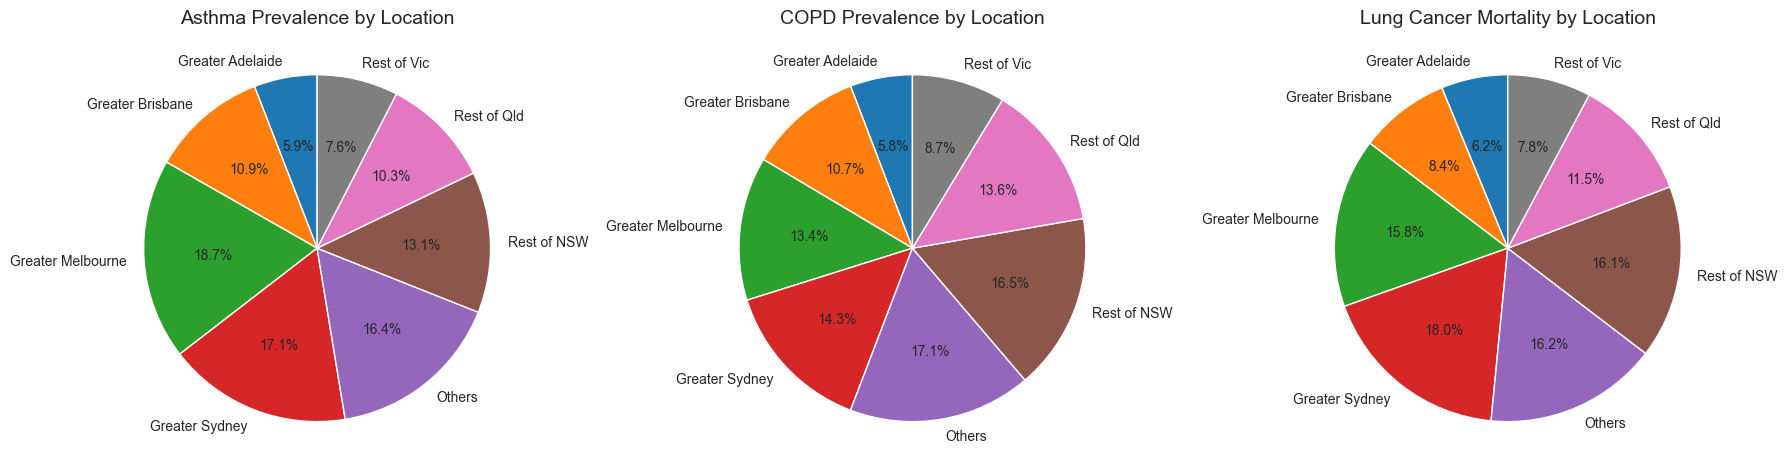

In [19]:
# Major locations
major_locations = ['Greater Melbourne', 'Greater Sydney', 'Greater Brisbane', 'Greater Adelaide', 'Rest of Vic', 'Rest of NSW', 'Rest of Qld']

# Define the aggregation function
def aggregate_locations(location):
    if location in major_locations:
        return location
    else:
        return 'Others'

# Apply the aggregation function to create a new column 'aggregated_location'
merged_data_1.loc[:, 'aggregated_location'] = merged_data_1['gccsa_name'].apply(aggregate_locations)

# Filter data for pie charts (include only major locations and "Others")
filtered_data2 = merged_data_1.groupby('aggregated_location')[['Total asthma', 'Total COPD', 'Lung cancer total mortality']].sum()

# Create subplots for pie charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 12))

# Plot pie chart for Asthma prevalence
ax1.pie(filtered_data2['Total asthma'], labels=filtered_data2.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Asthma Prevalence by Location', fontsize=14)

# Plot pie chart for COPD prevalence
ax2.pie(filtered_data2['Total COPD'], labels=filtered_data2.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('COPD Prevalence by Location', fontsize=14)

# Plot pie chart for Lung Cancer mortality
ax3.pie(filtered_data2['Lung cancer total mortality'], labels=filtered_data2.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Lung Cancer Mortality by Location', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Insights from Distribution Charts:

1. Urban Air Quality and Environmental Factors:
- Higher Pollution Levels in Urban Centers: Major cities like Greater Sydney (17.1% asthma, 14.3% COPD) and Greater Melbourne (18.7% asthma, 13.4% COPD) experience elevated levels of air pollution due to industrial activities and vehicular emissions. Poor air quality can exacerbate respiratory conditions, leading to higher prevalence rates compared to regional areas with cleaner air.
- Impact of Geographic Features: Coastal cities such as Greater Brisbane (10.9% asthma, 10.7% COPD) may benefit from milder climates and lower levels of pollution, contributing to relatively lower prevalence rates compared to inland cities.

2. Population Density and Lifestyle Factors:
- Urban Lifestyle and Health Impacts: Urban residents often face sedentary lifestyles, higher stress levels, and dietary habits that can contribute to respiratory issues. The higher population density in major cities may also increase the spread of respiratory infections, influencing disease prevalence.
- Healthcare Access and Awareness: Major cities like Greater Sydney and Greater Melbourne have better access to healthcare services and resources, resulting in higher diagnosis rates of respiratory conditions. Increased awareness and proactive healthcare-seeking behaviors contribute to higher reported prevalence rates.

3. Climate and Weather Conditions:
- Allergens and Seasonal Patterns: Differences in allergen exposure and seasonal variations can affect asthma prevalence. Regions with specific allergen profiles or seasonal triggers may experience higher rates of asthma.

4. Demographic and Socioeconomic Factors:
- Population Age and Socioeconomic Status: Regions with older populations or lower socioeconomic status (e.g., Rest of NSW - 13.1% asthma, 16.5% COPD) may exhibit higher prevalence rates due to factors such as smoking rates and occupational exposures.
- Rural Health Challenges: Regional areas face challenges related to healthcare access and infrastructure, impacting disease detection and management.

### Lung Cancer Prevalence by Gender and Location:
---------------------------------
Next, let's visualise lung cancer prevalence rates based on gender across multiple locations. The grouped bar chart below compares the prevalence rates of lung cancer between males and females in different geographical areas, providing insights into potential gender disparities in lung cancer incidence.

In [20]:
# Merge the male and female lung cancer datasets based on location
merged_data_2 = male_lung_cancer_data[['gccsa_name', 'Lung cancer rate per 100k']].merge(female_lung_cancer_data[['gccsa_name', 'Lung cancer rate per 100k']], how='inner', on='gccsa_name', suffixes=('_male', '_female'))

merged_data_2.head()

,gccsa_name,Lung cancer rate per 100k_male,Lung cancer rate per 100k_female
0,Greater Sydney,37.96,25.14
1,Rest of NSW,61.25,38.71
2,Greater Melbourne,36.72,24.44
3,Rest of Vic,56.77,35.15
4,Greater Brisbane,38.57,24.84


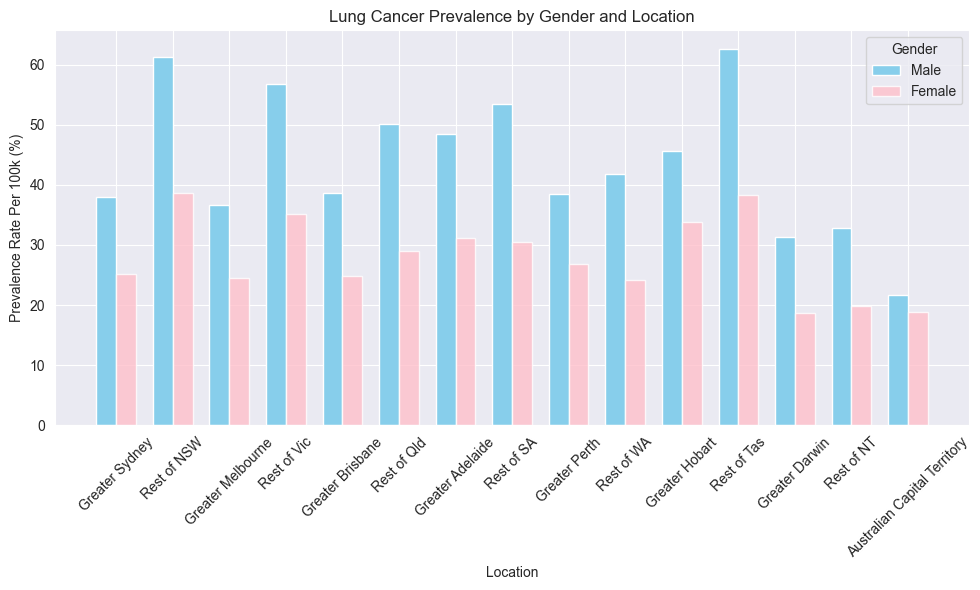

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot clustered bar chart
bar_width = 0.35
index = np.arange(len(merged_data_2))

# Plot bars for male and female prevalence rates
plt.bar(index, merged_data_2['Lung cancer rate per 100k_male'], width=bar_width, label='Male', color='skyblue')
plt.bar(index + bar_width, merged_data_2['Lung cancer rate per 100k_female'], width=bar_width, label='Female', color='pink', alpha=0.8)

# Customize labels and ticks
plt.xlabel('Location')
plt.ylabel('Prevalence Rate Per 100k (%)')
plt.title('Lung Cancer Prevalence by Gender and Location')
plt.xticks(index + bar_width / 2, merged_data_2['gccsa_name'], rotation=45)  # Center x-ticks between bars
plt.legend(title='Gender')

# Show plot
plt.tight_layout()
plt.show()

### Insights from Lung Cancer Prevalence by Gender and Location:

1. Regional Disparities in Lung Cancer Prevalence:
The data highlights significant regional variations in lung cancer prevalence rates. For instance, regions such as 'Rest of NSW' exhibit a notably higher average prevalence rate of 61.25 per 100,000 population for males and 38.71 per 100,000 population for females, compared to major urban centers like 'Greater Sydney' with 37.96 per 100,000 population for males and 25.14 per 100,000 population for females.

2. Gender Discrepancies in Prevalence Rates:
Across most regions, males consistently demonstrate higher lung cancer prevalence rates than females. Notable discrepancies are observed in locations like 'Rest of Vic', where the male prevalence rate reaches 56.77 per 100,000 population compared to 35.15 per 100,000 population for females.

3. Urban-Rural Contrasts:
The data suggests a trend of elevated lung cancer prevalence rates in rural and regional areas compared to major metropolitan regions. For example, 'Rest of Qld' demonstrates 50.17 per 100,000 population for males and 29.07 per 100,000 population for females, whereas 'Greater Brisbane' has 38.57 per 100,000 population for males and 24.84 per 100,000 population for females.

4. Region-Specific Observations:
Noteworthy observations include heightened prevalence rates in Tasmania ('Rest of Tas') with 62.54 per 100,000 population for males and 38.24 per 100,000 population for females, alongside relatively lower rates in the Australian Capital Territory ('Australian Capital Territory') with 21.74 per 100,000 population for males and 18.91 per 100,000 population for females.

5. Lower Prevalence Rates in Urban Centers:
Major cities such as 'Greater Sydney', 'Greater Melbourne', and 'Greater Brisbane' exhibit comparatively lower lung cancer prevalence rates. For instance, 'Greater Sydney' reports 37.96 per 100,000 population for males and 25.14 per 100,000 population for females, suggesting potential differences in lifestyle factors or healthcare access.


### Prevalence of Asthma and COPD by Income Level:
---------------------------------
Next, we will use boxplots to visualize the prevalence of asthma and COPD (Chronic Obstructive Pulmonary Disease) across different weekly income levels. Boxplots are effective for understanding the distribution of prevalence rates within each income category, highlighting potential disparities or trends based on socioeconomic factors.

The analysis will provide insights into how asthma and COPD prevalence vary across income brackets, aiding in the identification of potential socioeconomic determinants of respiratory health conditions.

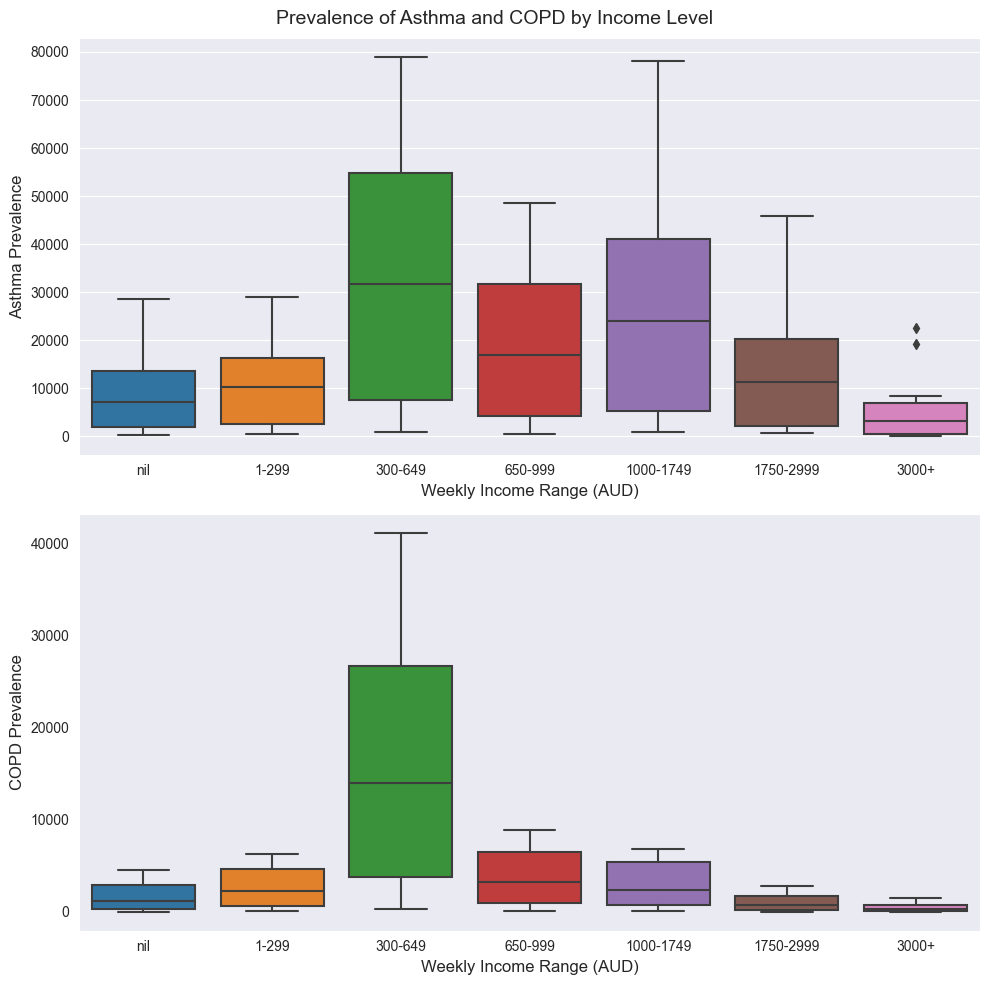

In [22]:
# Get required subsets of data
asthma_data = census_by_inc_emp_data[['Weekly income (nil) asthma', 'Weekly income (1-299) asthma', 'Weekly income (300-649) asthma', 'Weekly income (650-999) asthma', 'Weekly income (1000-1749) asthma', 'Weekly income (1750-2999) asthma', 'Weekly income (3000+) asthma']]
copd_data = census_by_inc_emp_data[['Weekly income (nil) COPD', 'Weekly income (1-299) COPD', 'Weekly income (300-649) COPD', 'Weekly income (650-999) COPD', 'Weekly income (1000-1749) COPD', 'Weekly income (1750-2999) COPD', 'Weekly income (3000+) COPD']]

# Preprocess column names to extract the desired label
income_labels = [col.split('(')[1].split(')')[0] for col in asthma_data.columns]

# Create subplots for each disease
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the boxes
sns.boxplot(data=asthma_data, palette='tab10', ax=axes[0])
axes[0].set_ylabel('Asthma Prevalence', fontsize=12)
axes[0].set_xlabel('Weekly Income Range (AUD)', fontsize=12)
axes[0].set_xticklabels(income_labels)

sns.boxplot(data=copd_data, palette='tab10', ax=axes[1])
axes[1].set_ylabel('COPD Prevalence', fontsize=12)
axes[1].set_xlabel('Weekly Income Range (AUD)', fontsize=12)
axes[1].set_xticklabels(income_labels)

# Add title
plt.suptitle('Prevalence of Asthma and COPD by Income Level', fontsize=14)

# Add gridlines along the y-axis
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Insights from Asthma and COPD Prevalence by Income Level:

- Asthma Prevalence by Weekly Income Level:
    - Mean Prevalence: The highest mean prevalence of asthma is observed in the income range of "Weekly income (300-649) asthma" with a mean value of approximately 32,445 cases, followed by "Weekly income (1750-2999) asthma" and "Weekly income (1000-1749) asthma" with mean values of 25,758 and 14,336 cases, respectively.
    - Variability: The standard deviation (std) is relatively high across all income levels, indicating significant variability in asthma prevalence within each income category.
    - Distribution: The range of asthma prevalence spans from a minimum of around 196 cases (in "Weekly income (nil) asthma") to a maximum of approximately 78,964 cases (in "Weekly income (300-649) asthma"), highlighting considerable variation in asthma rates across income groups.

- COPD Prevalence by Weekly Income Level:
    - Mean Prevalence: The highest mean prevalence of COPD is observed in the income range of "Weekly income (300-649) COPD" with a mean value of approximately 15,446 cases, followed by "Weekly income (1000-1749) COPD" and "Weekly income (1750-2999) COPD" with mean values of 2,951 and 1,021 cases, respectively.
    - Variability: Similar to asthma, there is notable variability in COPD prevalence within each income category, as indicated by the standard deviation values.
    - Distribution: The range of COPD prevalence varies widely across income levels, with a minimum of approximately 43 cases (in "Weekly income (nil) COPD") and a maximum of around 41,176 cases (in "Weekly income (300-649) COPD").

1. Income Disparities in Respiratory Health:
The data suggests that individuals in lower income brackets (such as "Weekly income (nil)") exhibit lower mean prevalence of asthma and COPD compared to those in higher income ranges. This observation may reflect disparities in access to healthcare services, resulting in fewer diagnoses.

2. Financial Impact on Disease Burden:
Higher mean prevalence of asthma and COPD in specific income ranges (e.g., "Weekly income (300-649)" for asthma and COPD) could indicate a significant burden of respiratory diseases among individuals with moderate income levels. This finding underscores the potential financial implications of managing chronic respiratory conditions for individuals and healthcare systems.

3. Healthcare Access and Prevention:
Variability in asthma and COPD prevalence within income categories highlights the need for targeted healthcare interventions. Individuals with lower incomes may face barriers to accessing preventive care, early diagnosis, and treatment for respiratory conditions, leading to higher prevalence rates.

4. Policy and Public Health Interventions:
Addressing disparities in respiratory health requires holistic approaches that consider socioeconomic factors. Policy initiatives aimed at improving income equality, enhancing access to healthcare services, and promoting healthy environments can help mitigate disparities in asthma and COPD prevalence.

# Correlation Analysis between Air Quality (PM2.5) and Lung Disease
---------------------------------
Now that all exploratory data analysis is done, we will focus on the correlation between air quality, especially PM2.5, and lung-related disorders among the population in Victoria.

In [23]:
# lung_cancer
lung_cancer_df = merged_data_1[merged_data_1['gccsa_code'].isin(['2GMEL', '2RVIC'])]

In [24]:
region_map = {
    'Alphington': 'Greater Melbourne',
    'Bendigo': 'Rest of Vic',
    'Box Hill': 'Greater Melbourne',
    'Brighton': 'Greater Melbourne',
    'Campbellfield': 'Greater Melbourne',
    'Churchill': 'Rest of Vic',
    'Footscray': 'Greater Melbourne',
    'Geelong South': 'Rest of Vic',
    'Melbourne CBD': 'Greater Melbourne',
    'Melton': 'Greater Melbourne',
    'Moe': 'Rest of Vic',
    'Morwell East': 'Rest of Vic',
    'Morwell South': 'Rest of Vic',
    'Newborough': 'Rest of Vic',
    'Traralgon': 'Rest of Vic'
}

In [25]:
pm25_df = summed_data[['location_name', 'value']].copy()
pm25_df.rename(columns={'value': 'PM2.5'}, inplace=True)

# Map region to the PM2.5 dataframe
pm25_df.loc[:, 'region'] = pm25_df['location_name'].map(region_map)
pm25_df

,location_name,PM2.5,region
0,Alphington,6.622210,Greater Melbourne
1,Bendigo,3.321866,Rest of Vic
2,Box Hill,5.096341,Greater Melbourne
3,Brighton,6.893843,Greater Melbourne
4,Campbellfield,6.479662,Greater Melbourne
5,Churchill,5.841217,Rest of Vic
6,Footscray,5.760731,Greater Melbourne
7,Geelong South,4.394554,Rest of Vic
8,Melbourne CBD,7.273835,Greater Melbourne
9,Melton,5.519013,Greater Melbourne


In [26]:
# Group by region and calculate the mean of PM2.5 values
pm25_aggregated = pm25_df.groupby(['region'])['PM2.5'].mean().reset_index()  ##
pm25_aggregated

,region,PM2.5
0,Greater Melbourne,6.235091
1,Rest of Vic,5.289477


In [27]:
merged_df = pd.merge(lung_cancer_df, pm25_aggregated, left_on='gccsa_name', right_on='region', how='inner')
merged_df

,gccsa_code,gccsa_name,Lung cancer total mortality,Lung cancer population,Lung cancer rate per 100k,All cancer total mortality,All cancer population,Total asthma,Employed asthma,Australian asthma,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD,aggregated_location,region,PM2.5
0,2GMEL,Greater Melbourne,6377,20904141,30.51,35887,20904141,386347,208830,292521,58925,37523,91496,20287,Greater Melbourne,Greater Melbourne,6.235091
1,2RVIC,Rest of Vic,3138,6834239,45.92,17475,6834239,156014,73533,140299,38195,31287,13405,5734,Rest of Vic,Rest of Vic,5.289477


In [28]:
columns_list = [
    'gccsa_name',
    'Lung cancer total mortality',
    'All cancer total mortality',
    'Total COPD',
    'Australian COPD',
    'Foreigner asthma',
    'Foreigner COPD'
]
df_plot = merged_df[columns_list]
df_plot

,gccsa_name,Lung cancer total mortality,All cancer total mortality,Total COPD,Australian COPD,Foreigner asthma,Foreigner COPD
0,Greater Melbourne,6377,35887,58925,37523,91496,20287
1,Rest of Vic,3138,17475,38195,31287,13405,5734


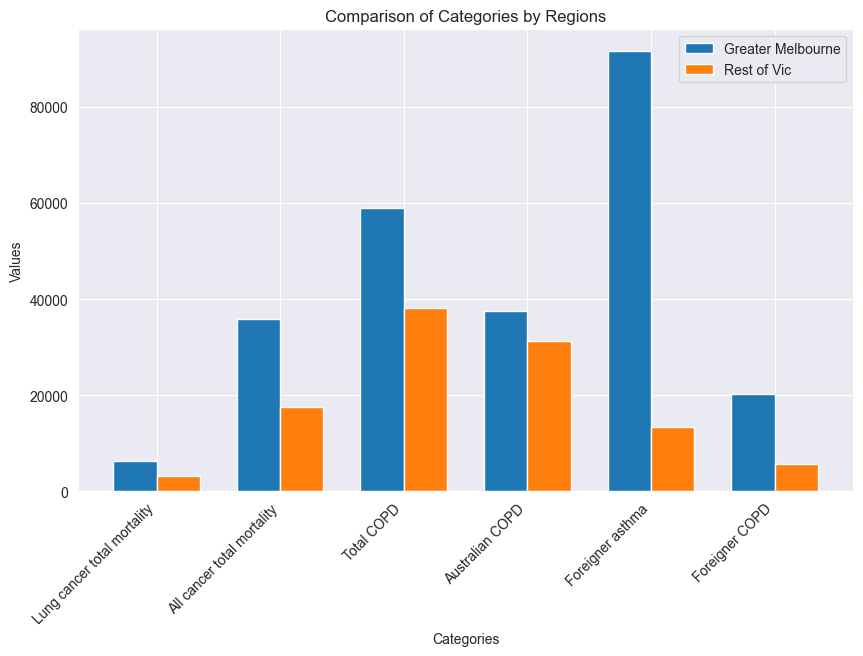

In [29]:
regions = df_plot['gccsa_name']
categories = df_plot.columns[1:]
data = df_plot.iloc[:, 1:].values

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, data[0], bar_width, label=regions[0])
bar2 = ax.bar([i + bar_width for i in index], data[1], bar_width, label=regions[1])

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Categories by Regions')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.show()